# GLOBAL POWER PLANT ANALYSIS

![Power Plants](powerlines_snapshot.jpg)

***
Notebook Authors:

  [David Ambani](https://github.com/bulemi2)<br>
  [Cynthia Kareko](https://github.com/karekocyn)<br>
  [Joy Wangui](https://github.com/carfew001)<br>
  [Emmanuel Rono](https://github.com/marttech26)<br>

***

## 1. PROJECT OVERVIEW

### (a) Introduction

Investigating the global renewable energy landscape, this project plays a crucial role in uncovering complex patterns, identifying trends, and extracting meaningful insights. Our main goal is to provide a comprehensive understanding of renewable energy generation, capacity, and the changing importance of different renewable energy sources worldwide. Through rigorous analysis and predictive modeling methods, we aim to shed light on the past, present, and future dynamics of renewable energy production globally. In doing so, we seek to provide valuable insights to stakeholders, shaping the discourse on sustainable energy and enriching our collective knowledge of renewable energy infrastructure worldwide.

 ### (b) Business Understanding

In the current era marked by energy transitions and growing sustainability imperatives, the Global Renewable Energy Generation and Capacity Analysis project endeavors to decode the intricacies of the global renewable energy landscape. Through an in-depth exploration of various renewable energy sources, their capacities, and their contributions to renewable energy generation, the project aims to offer a comprehensive overview of the global renewable energy ecosystem. These insights will equip stakeholders, policymakers, and investors with valuable knowledge about the factors influencing the renewable energy industry, enabling informed decision-making in this rapidly evolving and crucial sector.

This Global Renewable Energy Analysis is set to benefit the following stakeholders;

- Power generation companies-Strategic planning
- Environmental Agencies-Providing environmental impact assessment
- Researchers and Academia-Contributing to advancements in energy studies
- Local communities-Informed community engagement
- Technology providers-Market identification and growth opportunities
- Government and Regulatory Bodies-Informed decision making
- Energy companies and investors looking for opportunities in the renewable energy market.


### (c) Problem Statement

The absence of a comprehensive analysis of global renewable energy data impedes stakeholders' ability to make informed decisions in the evolving energy landscape. There is a pressing need for a systematic exploration of renewable energy generation, capacity trends, and the impact of renewable energy sources on global energy production. This project aims to address the lack of actionable insights, which hinders effective decision-making for governments, investors, and energy companies, by providing a clear understanding of the global renewable energy scenario through data-driven analysis.

Our strategic approach involves a meticulous examination of data preprocessing, thoughtful selection of modeling techniques, and the establishment of robust evaluation metrics. This comprehensive methodology seeks to offer a detailed exploration of the global renewable energy landscape, enabling stakeholders to make well-informed decisions in a rapidly transforming sector. The ultimate objective is to bridge the gap in actionable insights, facilitating informed decision-making and promoting a deeper understanding of the intricate dynamics shaping the global renewable energy infrastructure.

### (d) Research Questions

- How has the production of electricity from renewable sources changed over time? <br>

- Which renewable energy source shows the most significant growth, and what are the underlying reasons for this trend?<br>

- To what extent has the adoption of renewable energy sources impacted the overall energy mix, and what are the key challenges and opportunities associated with integrating renewable technologies into the global power infrastructure?<br>

### (e) The Main Objective

To construct a predictive model utilizing the examination of worldwide renewable energy data to precisely anticipate the generation of renewable energy from various other sources.

### (f) The Specific Objectives


Specific Objectives

- To assess the role each renewable energy source plays in the overall energy blend.
- To identify opportunities to enhance the portion of renewable energy in global electricity production, optimizing the shift towards sustainable sources.
- To examine how renewable energy is distributed among different power regions.

### (g) Data Understanding

Entity	Code	Year	Electricity from wind - TWh	Electricity from hydro - TWh	Electricity from solar - TWh	Other renewables including bioenergy - TWh

The dataset contains the following columns with their descriptions:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [4]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `fuel (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_ (number): electricity generation in gigawatt-hours reported
- `estimated_generation_gwh` (number): estimated annual electricity generation in gigawatt-hours

The database is available for immediate download and use through the http://datasets.wri.org/dataset/globalpowerplantdatabase

**Importing libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd  

# Creating visualizations
import matplotlib.pyplot as plt  

# Statistical data visualization
import seaborn as sns  

# Numerical operations
import numpy as np  

import pickle

# Working with geospatial data
# from geopy.distance import great_circle
# import geopandas as gpd

# Handling date and time information
import datetime as dt  

# Mathematical functions
import math  

# Importing from functions.py
from functions import plot_top_n, plot_top_and_bottom_countries_by_capacity, plot_capacity_generation_scatter, plot_power_plant_distribution

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

## 2. Data Cleaning

In [2]:
# Read CSV file into data frame
df = pd.read_csv('modern-renewable-prod.csv')

In [3]:
#Check the first few rows of the DataFrame
df.head()

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,ASEAN (Ember),NaN,2000,0.0,50.37,0.0,22.400000
1,ASEAN (Ember),NaN,2001,0.0,54.26,0.0,22.289999
2,ASEAN (Ember),NaN,2002,0.0,53.32,0.0,22.540000
3,ASEAN (Ember),NaN,2003,0.0,53.28,0.0,22.250000
4,ASEAN (Ember),NaN,2004,0.0,52.88,0.0,24.039999


In [4]:
# Display the shape of the DataFrame
df.shape

(8961, 7)

This indicates that the DataFrame comprises 34,936 rows and 36 columns. Each row corresponds to an individual power plant, and the columns represent the characteristics or attributes associated with these interactions.

In [5]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8961 non-null   object 
 1   Code                                        7354 non-null   object 
 2   Year                                        8961 non-null   int64  
 3   Electricity from wind - TWh                 8000 non-null   float64
 4   Electricity from hydro - TWh                8863 non-null   float64
 5   Electricity from solar - TWh                7956 non-null   float64
 6   Other renewables including bioenergy - TWh  8148 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 490.2+ KB


In [6]:
# Display descriptive statistics of the DataFrame
df.describe()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
count,8961.000000,8000.000000,8863.000000,7956.000000,8148.000000
mean,2000.253655,17.529973,119.982263,7.038448,13.423971
std,15.770290,101.380285,369.780979,51.694972,51.549803
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.100000,0.000000,0.000000
50%,2004.000000,0.000000,3.838000,0.000000,0.060000
75%,2013.000000,0.138831,31.482000,0.020000,2.010000
max,2022.000000,2098.460000,4339.530000,1310.020000,771.910000


In [7]:
#Check the unique values in each column
df.nunique()

Entity                                         252
Code                                           217
Year                                            58
Electricity from wind - TWh                   1554
Electricity from hydro - TWh                  4937
Electricity from solar - TWh                  1127
Other renewables including bioenergy - TWh    2766
dtype: int64

In [8]:
df.isna().sum()

Entity                                           0
Code                                          1607
Year                                             0
Electricity from wind - TWh                    961
Electricity from hydro - TWh                    98
Electricity from solar - TWh                  1005
Other renewables including bioenergy - TWh     813
dtype: int64

In [9]:
df.columns

Index(['Entity', 'Code', 'Year', 'Electricity from wind - TWh',
       'Electricity from hydro - TWh', 'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh'],
      dtype='object')

In [10]:
#fill nulls
df.fillna(0, inplace=True)

In [11]:
df.isna().sum()

Entity                                        0
Code                                          0
Year                                          0
Electricity from wind - TWh                   0
Electricity from hydro - TWh                  0
Electricity from solar - TWh                  0
Other renewables including bioenergy - TWh    0
dtype: int64

In [12]:
df.dtypes

Entity                                         object
Code                                           object
Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
dtype: object

In [13]:
new_df = df.copy()
new_df

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,ASEAN (Ember),0,2000,0.0,50.37,0.00,22.400000
1,ASEAN (Ember),0,2001,0.0,54.26,0.00,22.289999
2,ASEAN (Ember),0,2002,0.0,53.32,0.00,22.540000
3,ASEAN (Ember),0,2003,0.0,53.28,0.00,22.250000
4,ASEAN (Ember),0,2004,0.0,52.88,0.00,24.039999
...,...,...,...,...,...,...,...
8956,Zimbabwe,ZWE,2017,0.0,3.97,0.01,0.320000
8957,Zimbabwe,ZWE,2018,0.0,5.05,0.02,0.390000
8958,Zimbabwe,ZWE,2019,0.0,4.17,0.03,0.380000
8959,Zimbabwe,ZWE,2020,0.0,3.81,0.03,0.350000


In [14]:
df.drop(columns=['Code', 'Entity'], inplace=True)

In [15]:
df.corr()['Electricity from wind - TWh']

Year                                          0.170419
Electricity from wind - TWh                   1.000000
Electricity from hydro - TWh                  0.675541
Electricity from solar - TWh                  0.949451
Other renewables including bioenergy - TWh    0.898073
Name: Electricity from wind - TWh, dtype: float64

There's good correlation so we can do regression.

In [16]:
df.columns

Index(['Year', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh'],
      dtype='object')

In [17]:
df

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,2000,0.0,50.37,0.00,22.400000
1,2001,0.0,54.26,0.00,22.289999
2,2002,0.0,53.32,0.00,22.540000
3,2003,0.0,53.28,0.00,22.250000
4,2004,0.0,52.88,0.00,24.039999
...,...,...,...,...,...
8956,2017,0.0,3.97,0.01,0.320000
8957,2018,0.0,5.05,0.02,0.390000
8958,2019,0.0,4.17,0.03,0.380000
8959,2020,0.0,3.81,0.03,0.350000


### Feature Engineering

In [18]:
# 1. Total Renewable Electricity - TWh
df['Total Renewable Electricity - TWh'] = df['Electricity from wind - TWh'] + df['Electricity from hydro - TWh'] + df['Electricity from solar - TWh'] + df['Other renewables including bioenergy - TWh']
df

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Total Renewable Electricity - TWh
0,2000,0.0,50.37,0.00,22.400000,72.770000
1,2001,0.0,54.26,0.00,22.289999,76.549999
2,2002,0.0,53.32,0.00,22.540000,75.860000
3,2003,0.0,53.28,0.00,22.250000,75.530000
4,2004,0.0,52.88,0.00,24.039999,76.919999
...,...,...,...,...,...,...
8956,2017,0.0,3.97,0.01,0.320000,4.300000
8957,2018,0.0,5.05,0.02,0.390000,5.460000
8958,2019,0.0,4.17,0.03,0.380000,4.580000
8959,2020,0.0,3.81,0.03,0.350000,4.190000


## 3. Exploratory Data Analysis (EDA)

With our data now cleaned and prepared, our next step involves visualizing it. The primary focus is on creating graphs and visuals to enhance our visual understanding of the data's insights. Seaborn and Matplotlib will be employed as the main tools for this visualization process.

In [19]:
df

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Total Renewable Electricity - TWh
0,2000,0.0,50.37,0.00,22.400000,72.770000
1,2001,0.0,54.26,0.00,22.289999,76.549999
2,2002,0.0,53.32,0.00,22.540000,75.860000
3,2003,0.0,53.28,0.00,22.250000,75.530000
4,2004,0.0,52.88,0.00,24.039999,76.919999
...,...,...,...,...,...,...
8956,2017,0.0,3.97,0.01,0.320000,4.300000
8957,2018,0.0,5.05,0.02,0.390000,5.460000
8958,2019,0.0,4.17,0.03,0.380000,4.580000
8959,2020,0.0,3.81,0.03,0.350000,4.190000


In [20]:
df.columns

Index(['Year', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Total Renewable Electricity - TWh'],
      dtype='object')

In [21]:
df.dtypes

Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
Total Renewable Electricity - TWh             float64
dtype: object

In [22]:
# df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [23]:
df.dtypes

Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
Total Renewable Electricity - TWh             float64
dtype: object

In [24]:
df

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Total Renewable Electricity - TWh
0,2000,0.0,50.37,0.00,22.400000,72.770000
1,2001,0.0,54.26,0.00,22.289999,76.549999
2,2002,0.0,53.32,0.00,22.540000,75.860000
3,2003,0.0,53.28,0.00,22.250000,75.530000
4,2004,0.0,52.88,0.00,24.039999,76.919999
...,...,...,...,...,...,...
8956,2017,0.0,3.97,0.01,0.320000,4.300000
8957,2018,0.0,5.05,0.02,0.390000,5.460000
8958,2019,0.0,4.17,0.03,0.380000,4.580000
8959,2020,0.0,3.81,0.03,0.350000,4.190000


### (a) Univariate Data Analysis

Univariate Analysis:

Electricity from wind - TWh:
Summary Statistics:
count    8961.000000
mean       15.650015
std        95.942845
min         0.000000
25%         0.000000
50%         0.000000
75%         0.060000
max      2098.460000
Name: Electricity from wind - TWh, dtype: float64


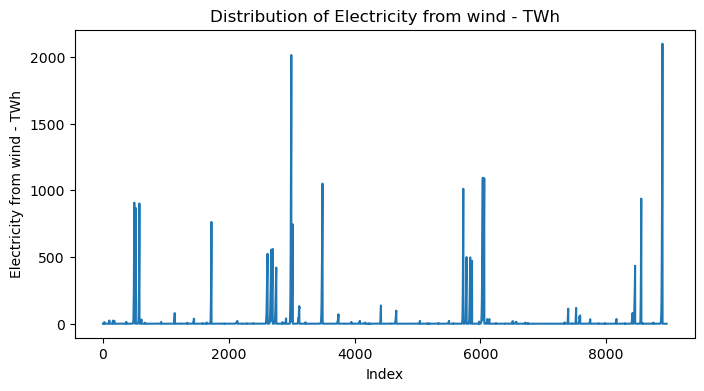


Electricity from hydro - TWh:
Summary Statistics:
count    8961.000000
mean      118.670104
std       367.964852
min         0.000000
25%         0.090000
50%         3.662900
75%        30.720000
max      4339.530000
Name: Electricity from hydro - TWh, dtype: float64


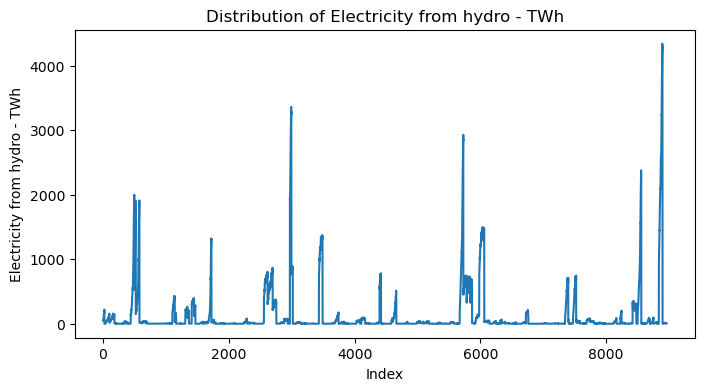


Electricity from solar - TWh:
Summary Statistics:
count    8961.000000
mean        6.249067
std        48.760196
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max      1310.020000
Name: Electricity from solar - TWh, dtype: float64


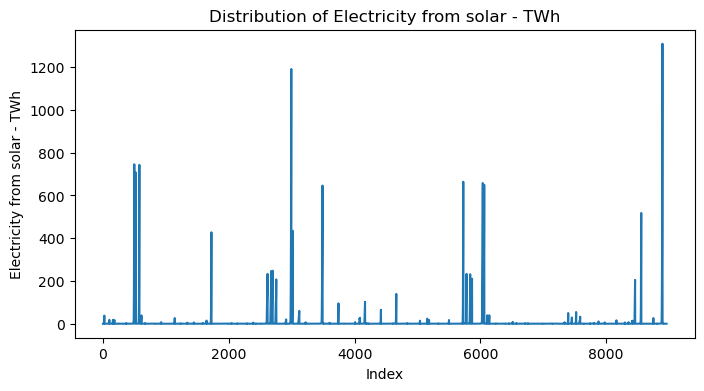


Other renewables including bioenergy - TWh:
Summary Statistics:
count    8961.000000
mean       12.206061
std        49.306469
min         0.000000
25%         0.000000
50%         0.020000
75%         1.520000
max       771.910000
Name: Other renewables including bioenergy - TWh, dtype: float64


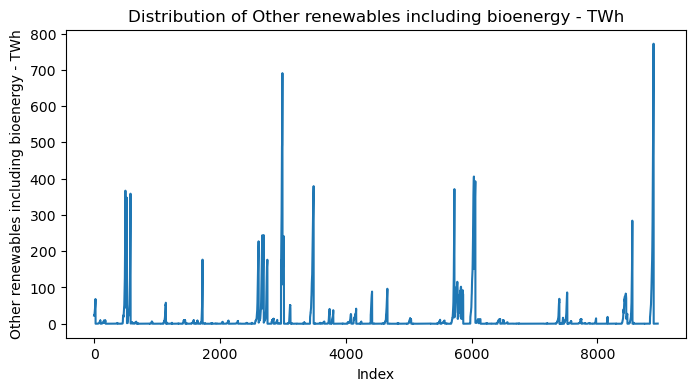


Total Renewable Electricity - TWh:
Summary Statistics:
count    8961.000000
mean      152.775248
std       519.585307
min         0.000000
25%         0.200000
50%         4.530000
75%        36.293809
max      8468.980000
Name: Total Renewable Electricity - TWh, dtype: float64


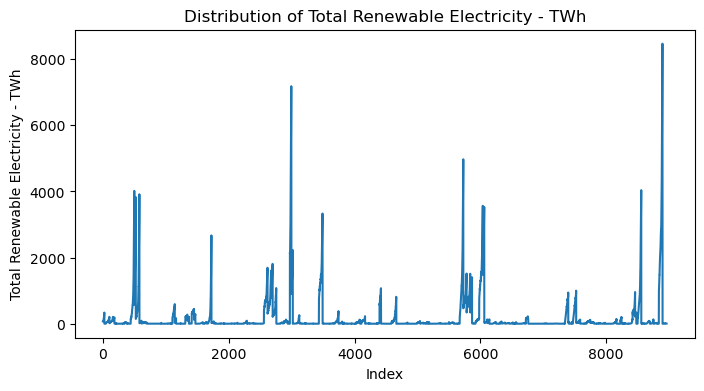

In [25]:
# Univariate Analysis with Line Plots
print("Univariate Analysis:")
for col in df.columns[1:]:
    print(f"\n{col}:")
    print("Summary Statistics:")
    print(df[col].describe())
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


In [26]:
df.columns

Index(['Year', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Total Renewable Electricity - TWh'],
      dtype='object')

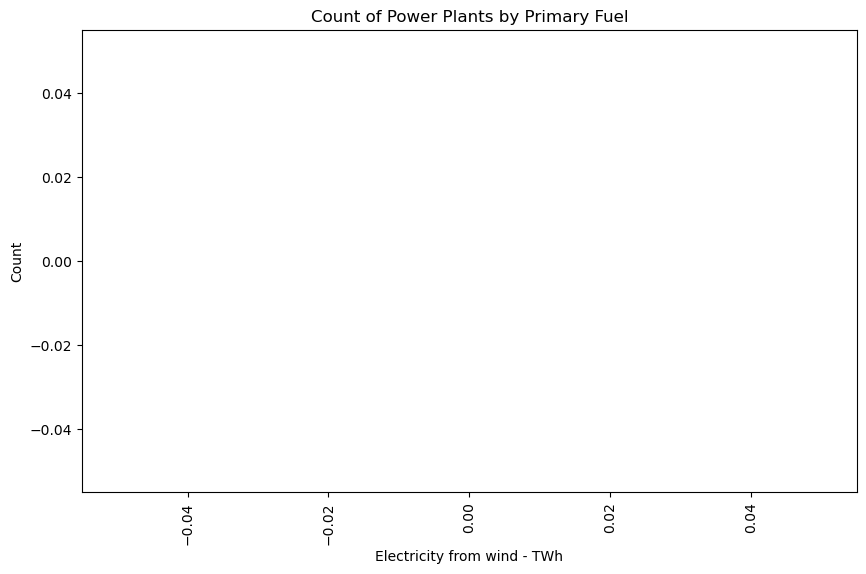

In [27]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
plt.plot(data=df, column='Electricity from wind - TWh')
plt.title('Count of Power Plants by Primary Fuel')
plt.xlabel('Electricity from wind - TWh')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

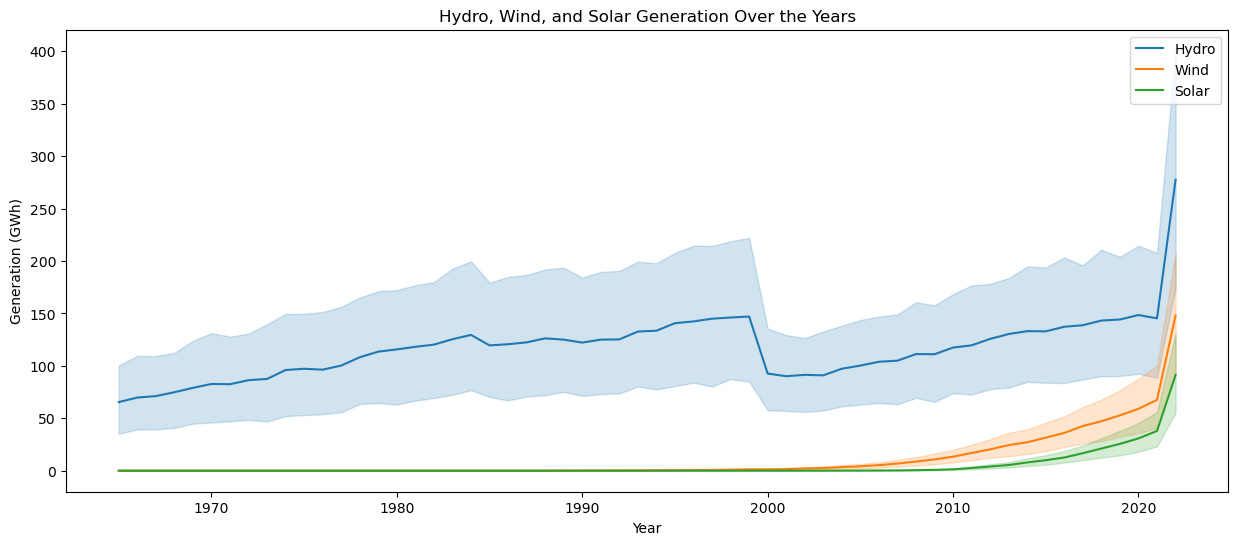

In [28]:
# Create a lineplot
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Year', y='Electricity from hydro - TWh', label='Hydro')
sns.lineplot(data=df, x='Year', y='Electricity from wind - TWh', label='Wind')
sns.lineplot(data=df, x='Year', y='Electricity from solar - TWh', label='Solar')

# Set the title and labels

plt.title('Hydro, Wind, and Solar Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Generation (GWh)')

# Show the legend
plt.legend()

# Display the plot
plt.show()

### (b) Bivariate Data Analysis

In [29]:
# Save the DataFrame 'df_cleaned' to a CSV file named 'modelling.csv'
df.to_csv('modelling.csv', index=False)

## 4. MODELLING 


In [30]:
modelling = pd.read_csv('modelling.csv')
modelling

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Total Renewable Electricity - TWh
0,2000,0.0,50.37,0.00,22.400000,72.770000
1,2001,0.0,54.26,0.00,22.289999,76.549999
2,2002,0.0,53.32,0.00,22.540000,75.860000
3,2003,0.0,53.28,0.00,22.250000,75.530000
4,2004,0.0,52.88,0.00,24.039999,76.919999
...,...,...,...,...,...,...
8956,2017,0.0,3.97,0.01,0.320000,4.300000
8957,2018,0.0,5.05,0.02,0.390000,5.460000
8958,2019,0.0,4.17,0.03,0.380000,4.580000
8959,2020,0.0,3.81,0.03,0.350000,4.190000


In [31]:
modelling.corr()['Total Renewable Electricity - TWh'].abs().sort_values(ascending=False)

Total Renewable Electricity - TWh             1.000000
Electricity from hydro - TWh                  0.968135
Other renewables including bioenergy - TWh    0.944267
Electricity from wind - TWh                   0.837388
Electricity from solar - TWh                  0.747449
Year                                          0.090435
Name: Total Renewable Electricity - TWh, dtype: float64

In [32]:
modelling.columns

Index(['Year', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Total Renewable Electricity - TWh'],
      dtype='object')

In [33]:
modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        8961 non-null   int64  
 1   Electricity from wind - TWh                 8961 non-null   float64
 2   Electricity from hydro - TWh                8961 non-null   float64
 3   Electricity from solar - TWh                8961 non-null   float64
 4   Other renewables including bioenergy - TWh  8961 non-null   float64
 5   Total Renewable Electricity - TWh           8961 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 420.2 KB


In [34]:
X = modelling.drop(columns=['Total Renewable Electricity - TWh'])
y = modelling['Total Renewable Electricity - TWh']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Initialize and train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predicting the Test set results
y_pred = linreg.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R^2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R^2 Score: 1.0
MAE: 9.756512430973303e-14
RMSE: 2.0342578231329404e-13


In [40]:
coefficients = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                             Coefficient
Year                                        2.751476e-15
Electricity from wind - TWh                 1.000000e+00
Electricity from hydro - TWh                1.000000e+00
Electricity from solar - TWh                1.000000e+00
Other renewables including bioenergy - TWh  1.000000e+00


In [41]:


# Create a pipeline for Linear Regression
linear_pipeline = Pipeline([
    ('linear', LinearRegression())  # Linear Regression model
])

# Create a pipeline for Random Forest Regression
rf_pipeline = Pipeline([
    ('rf', RandomForestRegressor())  # Random Forest Regression model
])

# Fit both pipelines on the scaled training data
linear_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
linear_predictions = linear_pipeline.predict(X_test)
rf_predictions = rf_pipeline.predict(X_test)

# Calculate R^2 score for Linear Regression
linear_r2 = r2_score(y_test, linear_predictions)
# Calculate R^2 score for Random Forest Regression
rf_r2 = r2_score(y_test, rf_predictions)

# Determine which model has the best R^2 score
best_model = linear_pipeline if linear_r2 > rf_r2 else rf_pipeline

# Print the R^2 and RMSE for the best model
best_model_name = "Linear Regression" if linear_r2 > rf_r2 else "Random Forest Regression"
best_r2 = linear_r2 if linear_r2 > rf_r2 else rf_r2
best_rmse = mean_squared_error(y_test, best_model.predict(X_test), squared=False)

print("Best Model:", best_model_name)
print("R^2 Score:", best_r2)
print("RMSE:", best_rmse)

#Serialize the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Best Model: Linear Regression
R^2 Score: 1.0
RMSE: 2.0342578231329404e-13


In [42]:
# function to check for overfitting in the models.

def check_overfitting(X_train, y_train, X_test, y_test):
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_train_pred = linear_model.predict(X_train)
    linear_test_pred = linear_model.predict(X_test)
    linear_train_mse = mean_squared_error(y_train, linear_train_pred)
    linear_test_mse = mean_squared_error(y_test, linear_test_pred)
    linear_train_r2 = r2_score(y_train, linear_train_pred)
    linear_test_r2 = r2_score(y_test, linear_test_pred)
    
    
    
    # Random Forest
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_train_pred = rf_model.predict(X_train)
    rf_test_pred = rf_model.predict(X_test)
    rf_train_mse = mean_squared_error(y_train, rf_train_pred)
    rf_test_mse = mean_squared_error(y_test, rf_test_pred)
    rf_train_r2 = r2_score(y_train, rf_train_pred)
    rf_test_r2 = r2_score(y_test, rf_test_pred)
    
    # Print results
    print("Linear Regression:")
    print(f"Train MSE: {linear_train_mse}")
    print(f"Test MSE: {linear_test_mse}")
    print(f"Train R^2: {linear_train_r2}")
    print(f"Test R^2: {linear_test_r2}")
    
    print("*" * 12)
    
    
    print("Random Forest:")
    print(f"Train MSE: {rf_train_mse}")
    print(f"Test MSE: {rf_test_mse}")
    print(f"Train R^2: {rf_train_r2}")
    print(f"Test R^2: {rf_test_r2}")
    
check_overfitting(X_train, y_train, X_test, y_test)

Linear Regression:
Train MSE: 3.610226145034605e-26
Test MSE: 4.13820489097757e-26
Train R^2: 1.0
Test R^2: 1.0
************
Random Forest:
Train MSE: 117.3535528519594
Test MSE: 964.3386536134077
Train R^2: 0.9995410137930838
Test R^2: 0.9968177162496865
